# Empathy Prediction

Short-listing volunteers, to work with alzheimer's patients, for a non-profit organization. <br><br>

![empathy](cover.jpg "Can we predict empathy?")



**Table of Contents**

* **Data Exploration**
    * Dimension
    * Examples
    * Summary
    * Data Types
    * Missing Values
    * Correlations
* **Data Preprocessing**
    * Encoding Strings
    * Handling Missing Values
    * Binarizing Class
    * Normalizing
    * Splitting Data
* **Evaluation Criteria**
* **Model Testing**
    * Dumb Classifiers
    * Perceptron
    * K Nearest Neighbours
    * Naive Bayes
    * Linear SVM
    * RBF SVM
    * Random Forest
    * XGBoost
* **Ensemble**
* **Testing**
* **Conclusion**
* **Further Analysis**
    * Final Remarks
    

In [1]:
from numpy import *
from statistics import *
from math import *
import pandas as pd
pd.options.mode.chained_assignment = None
import matplotlib.pyplot as plt
import warnings
from sklearn import svm, tree, linear_model
from sklearn.linear_model import Perceptron
from sklearn.svm import LinearSVC
from sklearn.preprocessing import MinMaxScaler, MaxAbsScaler
from sklearn.metrics import accuracy_score, recall_score, precision_score
from sklearn.naive_bayes import MultinomialNB, BernoulliNB 
from sklearn.neighbors import KNeighborsClassifier
from sklearn.ensemble import RandomForestClassifier
from sklearn.model_selection import GridSearchCV
from sklearn.model_selection import train_test_split,cross_val_score

# Data Exploration

### Dimensions

* We have got 1010 entries and 149 features (empathy is excluded)

In [2]:
data = pd.read_csv("responses.csv",delimiter=",")
data.shape

(1010, 150)

In [3]:
# To analyze all columns
pd.options.display.max_columns = 150

### Examples

* Most of the data is ordinal with a few catagorical and discrete columns.

In [4]:
data.head()

,Music,Slow songs or fast songs,Dance,Folk,Country,Classical music,Musical,Pop,Rock,Metal or Hardrock,Punk,"Hiphop, Rap","Reggae, Ska","Swing, Jazz",Rock n roll,Alternative,Latino,"Techno, Trance",Opera,Movies,Horror,Thriller,Comedy,Romantic,Sci-fi,War,Fantasy/Fairy tales,Animated,Documentary,Western,Action,History,Psychology,Politics,Mathematics,Physics,Internet,PC,Economy Management,Biology,Chemistry,Reading,Geography,Foreign languages,Medicine,Law,Cars,Art exhibitions,Religion,"Countryside, outdoors",Dancing,Musical instruments,Writing,Passive sport,Active sport,Gardening,Celebrities,Shopping,Science and technology,Theatre,Fun with friends,Adrenaline sports,Pets,Flying,Storm,Darkness,Heights,Spiders,Snakes,Rats,Ageing,Dangerous dogs,Fear of public speaking,Smoking,Alcohol,Healthy eating,Daily events,Prioritising workload,Writing notes,Workaholism,Thinking ahead,Final judgement,Reliability,Keeping promises,Loss of interest,Friends versus money,Funniness,Fake,Criminal damage,Decision making,Elections,Self-criticism,Judgment calls,Hypochondria,Empathy,Eating to survive,Giving,Compassion to animals,Borrowed stuff,Loneliness,Cheating in school,Health,Changing the past,God,Dreams,Charity,Number of friends,Punctuality,Lying,Waiting,New environment,Mood swings,Appearence and gestures,Socializing,Achievements,Responding to a serious letter,Children,Assertiveness,Getting angry,Knowing the right people,Public speaking,Unpopularity,Life struggles,Happiness in life,Energy levels,Small - big dogs,Personality,Finding lost valuables,Getting up,Interests or hobbies,Parents' advice,Questionnaires or polls,Internet usage,Finances,Shopping centres,Branded clothing,Entertainment spending,Spending on looks,Spending on gadgets,Spending on healthy eating,Age,Height,Weight,Number of siblings,Gender,Left - right handed,Education,Only child,Village - town,House - block of flats
0,5.0,3.0,2.0,1.0,2.0,2.0,1.0,5.0,5.0,1.0,1.0,1.0,1.0,1.0,3.0,1.0,1.0,1.0,1.0,5.0,4.0,2.0,5.0,4.0,4.0,1.0,5.0,5.0,3.0,1.0,2.0,1.0,5.0,1.0,3.0,3.0,5.0,3.0,5.0,3.0,3.0,3.0,3.0,5.0,3.0,1.0,1.0,1.0,1.0,5.0,3.0,3.0,2.0,1.0,5.0,5.0,1.0,4.0,4.0,2.0,5.0,4.0,4.0,1.0,1.0,1.0,1.0,1.0,5,3.0,1.0,3.0,2.0,never smoked,drink a lot,4.0,2.0,2.0,5.0,4.0,2.0,5.0,4.0,4.0,1.0,3.0,5.0,1.0,1.0,3.0,4.0,1.0,3.0,1.0,3.0,1,4.0,5.0,4.0,3.0,2.0,1.0,1.0,1.0,4,2.0,3,i am always on time,never,3.0,4.0,3.0,4.0,3.0,4.0,3.0,5.0,1.0,1.0,3.0,5.0,5.0,1.0,4.0,5.0,1.0,4.0,3.0,2.0,3.0,4.0,3.0,few hours a day,3.0,4.0,5.0,3.0,3.0,1,3.0,20.0,163.0,48.0,1.0,female,right handed,college/bachelor degree,no,village,block of flats
1,4.0,4.0,2.0,1.0,1.0,1.0,2.0,3.0,5.0,4.0,4.0,1.0,3.0,1.0,4.0,4.0,2.0,1.0,1.0,5.0,2.0,2.0,4.0,3.0,4.0,1.0,3.0,5.0,4.0,1.0,4.0,1.0,3.0,4.0,5.0,2.0,4.0,4.0,5.0,1.0,1.0,4.0,4.0,5.0,1.0,2.0,2.0,2.0,1.0,1.0,1.0,1.0,1.0,1.0,1.0,1.0,2.0,3.0,3.0,2.0,4.0,2.0,5.0,1.0,1.0,1.0,2.0,1.0,1,1.0,3.0,1.0,4.0,never smoked,drink a lot,3.0,3.0,2.0,4.0,5.0,4.0,1.0,4.0,4.0,3.0,4.0,3.0,2.0,1.0,2.0,5.0,4.0,4.0,1.0,2.0,1,2.0,4.0,3.0,2.0,4.0,4.0,4.0,1.0,3,1.0,3,i am often early,sometimes,3.0,4.0,4.0,4.0,4.0,2.0,4.0,2.0,2.0,5.0,4.0,4.0,4.0,1.0,4.0,3.0,5.0,3.0,4.0,5.0,3.0,2.0,3.0,few hours a day,3.0,4.0,1.0,4.0,2.0,5,2.0,19.0,163.0,58.0,2.0,female,right handed,college/bachelor degree,no,city,block of flats
2,5.0,5.0,2.0,2.0,3.0,4.0,5.0,3.0,5.0,3.0,4.0,1.0,4.0,3.0,5.0,5.0,5.0,1.0,3.0,5.0,3.0,4.0,4.0,2.0,4.0,2.0,5.0,5.0,2.0,2.0,1.0,1.0,2.0,1.0,5.0,2.0,4.0,2.0,4.0,1.0,1.0,5.0,2.0,5.0,2.0,3.0,1.0,5.0,5.0,5.0,5.0,5.0,5.0,5.0,2.0,1.0,1.0,4.0,2.0,5.0,5.0,5.0,5.0,1.0,1.0,1.0,1.0,1.0,1,1.0,1.0,1.0,2.0,tried smoking,drink a lot,3.0,1.0,2.0,5.0,3.0,5.0,3.0,4.0,5.0,1.0,5.0,2.0,4.0,1.0,3.0,5.0,4.0,4.0,1.0,5.0,5,5.0,4.0,2.0,5.0,3.0,2.0,5.0,5.0,1,3.0,3,i am often running late,sometimes,2.0,3.0,4.0,3.0,5.0,3.0,4.0,4.0,3.0,4.0,3.0,2.0,4.0,4.0,4.0,4.0,3.0,3.0,3.0,4.0,5.0,3.0,1.0,few hours a day,2.0,4.0,1.0,4.0,3.0,4,2.0,20.0,176.0,67.0,2.0,female,right handed,secondary school,no,city,block of flats
3,5.0,3.0,2.0,1.0,1.0,1.0,1.0,2.0,2.0,1.0,4.0,2.0

### Summary
* Summary is available for 139 rows. Meaning other 11 are non-numerical.
* Almost all rows have a few missing values (More Later)
* Most range from 1 to 5, except a few like age, weight etc.


In [5]:
print(data.describe().shape)
data.describe()

(8, 139)


,Music,Slow songs or fast songs,Dance,Folk,Country,Classical music,Musical,Pop,Rock,Metal or Hardrock,Punk,"Hiphop, Rap","Reggae, Ska","Swing, Jazz",Rock n roll,Alternative,Latino,"Techno, Trance",Opera,Movies,Horror,Thriller,Comedy,Romantic,Sci-fi,War,Fantasy/Fairy tales,Animated,Documentary,Western,Action,History,Psychology,Politics,Mathematics,Physics,Internet,PC,Economy Management,Biology,Chemistry,Reading,Geography,Foreign languages,Medicine,Law,Cars,Art exhibitions,Religion,"Countryside, outdoors",Dancing,Musical instruments,Writing,Passive sport,Active sport,Gardening,Celebrities,Shopping,Science and technology,Theatre,Fun with friends,Adrenaline sports,Pets,Flying,Storm,Darkness,Heights,Spiders,Snakes,Rats,Ageing,Dangerous dogs,Fear of public speaking,Healthy eating,Daily events,Prioritising workload,Writing notes,Workaholism,Thinking ahead,Final judgement,Reliability,Keeping promises,Loss of interest,Friends versus money,Funniness,Fake,Criminal damage,Decision making,Elections,Self-criticism,Judgment calls,Hypochondria,Empathy,Eating to survive,Giving,Compassion to animals,Borrowed stuff,Loneliness,Cheating in school,Health,Changing the past,God,Dreams,Charity,Number of friends,Waiting,New environment,Mood swings,Appearence and gestures,Socializing,Achievements,Responding to a serious letter,Children,Assertiveness,Getting angry,Knowing the right people,Public speaking,Unpopularity,Life struggles,Happiness in life,Energy levels,Small - big dogs,Personality,Finding lost valuables,Getting up,Interests or hobbies,Parents' advice,Questionnaires or polls,Finances,Shopping centres,Branded clothing,Entertainment spending,Spending on looks,Spending on gadgets,Spending on healthy eating,Age,Height,Weight,Number of siblings
count,1007.000000,1008.000000,1006.000000,1005.000000,1005.000000,1003.000000,1008.000000,1007.000000,1004.000000,1007.000000,1002.000000,1006.000000,1003.000000,1004.000000,1003.000000,1003.000000,1002.000000,1003.000000,1009.000000,1004.000000,1008.000000,1009.000000,1007.000000,1007.000000,1008.000000,1008.000000,1007.000000,1007.000000,1002.000000,1006.000000,1008.000000,1008.000000,1005.000000,1009.000000,1007.000000,1007.000000,1006.000000,1004.000000,1005.000000,1004.000000,1000.000000,1004.000000,1001.000000,1005.000000,1005.000000,1009.000000,1006.000000,1004.000000,1007.000000,1003.000000,1007.000000,1009.000000,1004.000000,995.000000,1006.000000,1003.000000,1008.000000,1008.000000,1004.000000,1002.000000,1006.000000,1007.000000,1006.00000,1007.000000,1009.000000,1008.000000,1007.000000,1005.000000,1010.000000,1007.000000,1009.000000,1009.000000,1009.000000,1007.000000,1003.000000,1005.000000,1007.000000,1005.000000,1007.000000,1003.000000,1006.000000,1009.000000,1006.000000,1004.000000,1006.000000,1009.000000,1003.000000,1006.000000,1007.000000,1005.000000,1006.000000,1006.000000,1005.000000,1010.000000,1004.000000,1003.000000,1008.000000,1009.000000,1006.000000,1009.000000,1008.000000,1008.000000,1010.000000,1007.000000,1010.000000,1007.000000,1008.000000,1006.000000,1007.000000,1005.000000,1008.000000,1004.000000,1006.000000,1008.000000,1006.000000,1008.000000,1008.000000,1007.000000,1007.000000,1006.000000,1005.000000,1006.000000,1006.000000,1006.000000,1005.000000,1007.000000,1008.000000,1006.000000,1007.000000,1008.000000,1008.000000,1007.000000,1007.000000,1010.000000,1008.00000,1003.000000,990.000000,990.000000,1004.000000
mean,4.731877,3.328373,3.113320,2.288557,2.123383,2.956132,2.761905,3.471698,3.761952,2.361470,2.456088,2.910537,2.769691,2.759960,3.141575,2.828514,2.842315,2.338983,2.139742,4.613546,2.793651,3.383548,4.494538,3.489573,3.113095,3.155754,3.749752,3.788481,3.643713,2.126243,3.536706,3.207341,3.138308,2.595639,2.334657,2.064548,4.175944,3.136454,2.643781,2.665339,2.165000,3.159363,3.082917,3.778109,2.516418,2.256690,2.686879,2.589641,2.273088,3.686939,2.461768,2.324083,1.901394,3.387940,3.291252,1.907278,2.362103,3.276786,3.234064,3.024950,4.557654,2.948361,3.33499,2.061569

### Data Types

* There are three types: float64, int64 and object


In [6]:
pd.DataFrame(data.dtypes).transpose()

,Music,Slow songs or fast songs,Dance,Folk,Country,Classical music,Musical,Pop,Rock,Metal or Hardrock,Punk,"Hiphop, Rap","Reggae, Ska","Swing, Jazz",Rock n roll,Alternative,Latino,"Techno, Trance",Opera,Movies,Horror,Thriller,Comedy,Romantic,Sci-fi,War,Fantasy/Fairy tales,Animated,Documentary,Western,Action,History,Psychology,Politics,Mathematics,Physics,Internet,PC,Economy Management,Biology,Chemistry,Reading,Geography,Foreign languages,Medicine,Law,Cars,Art exhibitions,Religion,"Countryside, outdoors",Dancing,Musical instruments,Writing,Passive sport,Active sport,Gardening,Celebrities,Shopping,Science and technology,Theatre,Fun with friends,Adrenaline sports,Pets,Flying,Storm,Darkness,Heights,Spiders,Snakes,Rats,Ageing,Dangerous dogs,Fear of public speaking,Smoking,Alcohol,Healthy eating,Daily events,Prioritising workload,Writing notes,Workaholism,Thinking ahead,Final judgement,Reliability,Keeping promises,Loss of interest,Friends versus money,Funniness,Fake,Criminal damage,Decision making,Elections,Self-criticism,Judgment calls,Hypochondria,Empathy,Eating to survive,Giving,Compassion to animals,Borrowed stuff,Loneliness,Cheating in school,Health,Changing the past,God,Dreams,Charity,Number of friends,Punctuality,Lying,Waiting,New environment,Mood swings,Appearence and gestures,Socializing,Achievements,Responding to a serious letter,Children,Assertiveness,Getting angry,Knowing the right people,Public speaking,Unpopularity,Life struggles,Happiness in life,Energy levels,Small - big dogs,Personality,Finding lost valuables,Getting up,Interests or hobbies,Parents' advice,Questionnaires or polls,Internet usage,Finances,Shopping centres,Branded clothing,Entertainment spending,Spending on looks,Spending on gadgets,Spending on healthy eating,Age,Height,Weight,Number of siblings,Gender,Left - right handed,Education,Only child,Village - town,House - block of flats
0,float64,float64,float64,float64,float64,float64,float64,float64,float64,float64,float64,float64,float64,float64,float64,float64,float64,float64,float64,float64,float64,float64,float64,float64,float64,float64,float64,float64,float64,float64,float64,float64,float64,float64,float64,float64,float64,float64,float64,float64,float64,float64,float64,float64,float64,float64,float64,float64,float64,float64,float64,float64,float64,float64,float64,float64,float64,float64,float64,float64,float64,float64,float64,float64,float64,float64,float64,float64,int64,float64,float64,float64,float64,object,object,float64,float64,float64,float64,float64,float64,float64,float64,float64,float64,float64,float64,float64,float64,float64,float64,float64,float64,float64,float64,int64,float64,float64,float64,float64,float64,float64,float64,float64,int64,float64,int64,object,object,float64,float64,float64,float64,float64,float64,float64,float64,float64,float64,float64,float64,float64,float64,float64,float64,float64,float64,float64,float64,float64,float64,float64,object,float64,float64,float64,float64,float64,int64,float64,float64,float64,float64,float64,object,object,object,object,object,object


### Missing Values

* The max number of missing value is 20 out of 1010, this is a very small number and I will fill it according to each class.
* Also, I am going to drop any column with missing Class (Empathy) as there is no suitable filling method.

In [7]:
missing = pd.DataFrame({'Number Missing': 1010 - data.apply(lambda x: x.count(), axis=0)})
missing.sort_values(by=['Number Missing'], ascending=False).transpose()

,Height,Weight,Passive sport,Chemistry,Geography,Punk,Smoking,Documentary,Latino,Theatre,Compassion to animals,"Reggae, Ska",Daily events,Rock n roll,Alternative,Gardening,"Techno, Trance","Countryside, outdoors",Criminal damage,Classical music,Age,Final judgement,Science and technology,Giving,Gender,Art exhibitions,Reading,PC,Friends versus money,Writing,Responding to a serious letter,Rock,Biology,Number of siblings,"Swing, Jazz",Movies,Spiders,Medicine,Socializing,Foreign languages,Economy Management,Prioritising workload,Folk,Country,Workaholism,Empathy,Self-criticism,Alcohol,Psychology,Energy levels,Getting up,Judgment calls,Cheating in school,Fun with friends,Mood swings,Reliability,Pets,Decision making,Loss of interest,Hypochondria,House - block of flats,Children,Internet,Dance,Village - town,"Hiphop, Rap",Questionnaires or polls,Western,Active sport,Personality,Small - big dogs,Finding lost valuables,Happiness in life,Cars,Getting angry,Funniness,Life struggles,Unpopularity,Interests or hobbies,Charity,Finances,Entertainment spending,Elections,Spending on looks,Waiting,Left - right handed,Appearence and gestures,Music,Healthy eating,Romantic,Religion,Physics,Adrenaline sports,Flying,Mathematics,Animated,Fantasy/Fairy tales,Heights,Dancing,Metal or Hardrock,Thinking ahead,Writing notes,Rats,Pop,Comedy,Action,Musical,Only child,History,Spending on healthy eating,Parents' advice,Horror,War,Shopping centres,Public speaking,Sci-fi,Branded clothing,Knowing the right people,God,Achievements,Changing the past,Punctuality,Lying,Darkness,New environment,Slow songs or fast songs,Shopping,Celebrities,Assertiveness,Borrowed stuff,Fear of public speaking,Education,Loneliness,Dangerous dogs,Opera,Ageing,Thriller,Musical instruments,Health,Keeping promises,Politics,Storm,Law,Fake,Spending on gadgets,Snakes,Dreams,Internet usage,Eating to survive,Number of friends
Number Missing,20,20,15,10,9,8,8,8,8,8,7,7,7,7,7,7,7,7,7,7,7,7,6,6,6,6,6,6,6,6,6,6,6,6,6,6,5,5,5,5,5,5,5,5,5,5,5,5,5,5,5,4,4,4,4,4,4,4,4,4,4,4,4,4,4,4,4,4,4,4,4,4,4,4,4,4,3,3,3,3,3,3,3,3,3,3,3,3,3,3,3,3,3,3,3,3,3,3,3,3,3,3,3,3,3,2,2,2,2,2,2,2,2,2,2,2,2,2,2,2,2,2,2,2,2,2,2,2,2,2,1,1,1,1,1,1,1,1,1,1,1,1,1,1,0,0,0,0,0,0


### Correlations

* [Note] I haven't processed the data yet, So these results aren't comprehensive.
* I am reducing features because its irrational to ask volunteers 150 questions. (how? see preprocessing)
* Now some insights:
    * As expected, life struggles and compassion to animals have relivety high correlation with empathy
    * Suprisingly, weight has a relitively negitive correlation with empathy.
    * Features like 'Spending on eating heatlty' have almost zero correlation.
    * Also, we can see some yellow regions in the entire matrix plot. Meaning some features are also correlated to each other.
* However, there aren't any signifcant results. Hence i am going to leave feature reduction for now.

In [8]:
corr = data.corr(method='pearson')
pd.DataFrame(corr.sort_values(by=['Empathy'],ascending=False)['Empathy']).transpose()

,Empathy,Life struggles,Judgment calls,Fantasy/Fairy tales,Children,Latino,Compassion to animals,Psychology,Theatre,Friends versus money,Reading,Giving,Romantic,Borrowed stuff,Writing notes,Foreign languages,Spiders,Dancing,Musical,Parents' advice,Folk,Comedy,Darkness,Art exhibitions,Animated,Final judgement,Music,Self-criticism,Decision making,God,"Swing, Jazz",Biology,Thinking ahead,Pop,Shopping,Alternative,Rats,Medicine,Elections,Keeping promises,Questionnaires or polls,Appearence and gestures,Reliability,Unpopularity,Finances,Rock n roll,"Countryside, outdoors",Ageing,Getting up,Health,Storm,Snakes,Prioritising workload,Rock,Religion,Dance,"Reggae, Ska",Writing,Finding lost valuables,Dangerous dogs,Workaholism,Healthy eating,Documentary,Daily events,Mood swings,Fun with friends,Heights,Country,Flying,Loneliness,Charity,Energy levels,Interests or hobbies,Classical music,Chemistry,History,Shopping centres,Opera,Number of friends,Hypochondria,Passive sport,Musical instruments,Celebrities,Number of siblings,"Techno, Trance",Law,Fear of public speaking,Pets,Responding to a serious letter,Public speaking,Socializing,Movies,Happiness in life,Punk,Cheating in school,Spending on healthy eating,Spending on looks,Entertainment spending,Thriller,Waiting,Knowing the right people,Metal or Hardrock,Assertiveness,New environment,Criminal damage,Personality,Funniness,Gardening,Age,Changing the past,Geography,Sci-fi,Dreams,Science and technology,Horror,Economy Management,Getting angry,Internet,Adrenaline sports,"Hiphop, Rap",War,Active sport,Eating to survive,Politics,Mathematics,Slow songs or fast songs,Action,Western,Loss of interest,Achievements,Small - big dogs,Branded clothing,Physics,Spending on gadgets,PC,Height,Fake,Cars,Weight
Empathy,1.0,0.254876,0.240678,0.19912,0.196399,0.192921,0.192552,0.187438,0.180313,0.177905,0.172885,0.163052,0.151782,0.146673,0.145245,0.138155,0.1372,0.128485,0.127417,0.114813,0.113706,0.113375,0.112518,0.111933,0.10857,0.104027,0.10272,0.102435,0.102026,0.099844,0.097228,0.095497,0.092754,0.090893,0.090716,0.088376,0.086169,0.085743,0.08511,0.084582,0.084498,0.083024,0.080666,0.077913,0.075835,0.07471,0.07353,0.07217,0.070694,0.069602,0.068683,0.068595,0.066864,0.065974,0.065334,0.059364,0.057708,0.055596,0.051753,0.050863,0.048691,0.048658,0.048038,0.047401,0.046725,0.043994,0.041564,0.041491,0.036214,0.033452,0.032781,0.031655,0.031072,0.030231,0.028922,0.026828,0.026625,0.025313,0.025168,0.024168,0.023905,0.023309,0.021639,0.020994,0.018938,0.016124,0.015059,0.009416,0.008696,0.00506,0.004965,0.004761,-0.002897,-0.003342,-0.00675,-0.006804,-0.007658,-0.01122,-0.012163,-0.013169,-0.015437,-0.017702,-0.020466,-0.021698,-0.022279,-0.02245,-0.025637,-0.026591,-0.027752,-0.03287,-0.033187,-0.036295,-0.037857,-0.040068,-0.043499,-0.044812,-0.055004,-0.058079,-0.059011,-0.06392,-0.06442,-0.065737,-0.067746,-0.077037,-0.081191,-0.093898,-0.095023,-0.098362,-0.099224,-0.103745,-0.104282,-0.109592,-0.115235,-0.143804,-0.144117,-0.14932,-0.163355,-0.167768,-0.171303


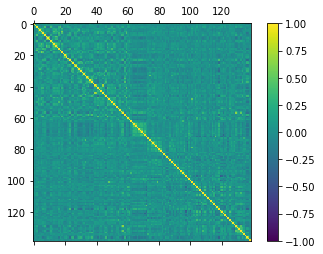

In [9]:
correlations = data.corr()
fig = plt.figure()
ax = fig.add_subplot(111)
cax = ax.matshow(correlations, vmin=-1, vmax=1)
fig.colorbar(cax)
plt.show()

# Data Preprocessing

### Encoding Strings

In [10]:
encoding = {"Smoking": {"never smoked": 1, "tried smoking": 2, "former smoker": 3, "current smoker": 4},
            "Alcohol": {"never": 1, "social drinker": 2, "drink a lot": 3},
            "Punctuality": {"i am often early": 1, "i am often early": 2, "i am often running late": 3, "i am always on time": 4},
            "Lying": {"never": 1, "sometimes": 2, "only to avoid hurting someone": 3, "everytime it suits me": 4},
            "Internet usage": {"no time at all": 1, "less than an hour a day": 2, "few hours a day": 3, "most of the day": 4},
            "Gender": {"male": 1, "female": 2},
            "Left - right handed": {"right handed": 1, "left handed": 2},
            "Education": {"primary school": 1, "currently a primary school pupil": 1, "secondary school": 2, "college/bachelor degree": 3, "masters degree": 4, "doctorate degree": 5},
            "Only child": {"no": 1, "yes": 2},
            "Village - town": {"village": 1, "city": 2},
            "House - block of flats": {"block of flats": 1, "house/bungalow": 2}}
data.replace(encoding, inplace=True)

### Handling Missing Values

In [11]:
# Removing rows with class label undefined
data = data[pd.notnull(data['Empathy'])]

# Filling the missing values with rounded mean for the column
data.fillna(round(data.mean()), inplace = True)

### Binarizing Class

In [12]:
data['Class'] = 42
data['Class'].loc[data['Empathy'] == 1] = 0
data['Class'].loc[data['Empathy'] == 2] = 0
data['Class'].loc[data['Empathy'] == 3] = 0
data['Class'].loc[data['Empathy'] == 4] = 1
data['Class'].loc[data['Empathy'] == 5] = 1
data.drop(['Empathy'], axis=1, inplace = True)

### Normalizing


In [13]:
# Splitting the data into x and y
x = data.values[:,0:149]
y = data.values[:,149]

# Most of the was converted to ordinal when encoding. e.g. smoking
# Normalizing the data between 1 and 5, rounded to nearest interger.
relacs = MinMaxScaler(feature_range=(1, 5)) 
data['Number of siblings'] = relacs.fit_transform(((data['Number of siblings'] - 0)/(10)).values.reshape(-1, 1)).round()
data['Height'] = relacs.fit_transform(((data['Height'] - 60)/(205-60)).values.reshape(-1, 1)).round()
data['Weight'] = relacs.fit_transform(((data['Weight'] - 40)/(165-40)).values.reshape(-1, 1)).round()
data['Age'] = relacs.fit_transform(((data['Age'] - 15)/(30-15)).values.reshape(-1, 1)).round()

x = data.values[:,0:149]

### Spliting Data

In [14]:
# Preserving a copy for analysis later.
orignalData = pd.read_csv("responses.csv",delimiter=",")
orignalData = orignalData[pd.notnull(orignalData['Empathy'])]

xTrain, xTest, yTrain, yTest, orig1, orig2 = train_test_split(x, y, orignalData, test_size=0.2, random_state=69)

# Evaluation Critera 


I'm using accuracy and recall as evaluation critera given the nature of task.
High recall would mean correctly classifying given a person was empathic. We dont want to misclassifying an empathic person. However, if we misclassify a non-empathic person, the person could later be screened in other stages. So, Ideally we want a high accuracy and high precision.

# Model Testing

All results are generated using 10 fold CV

### Dumb Classifiers

In [15]:
print("Random:", 
      "Accuracy:",(100*accuracy_score((random.randint(2, size=len(yTest))) , yTest)), 
      "Recall:", 100*recall_score(yTest, (random.randint(2, size=len(yTest)))))
print("Mode:", 
      "Accuracy:",(100*accuracy_score(ones(len(yTest)) , yTest)), 
      "Recall:", 100*recall_score(yTest, ones(len(yTest))))

Random: Accuracy: 40.79601990049751 Recall: 46.15384615384615
Mode: Accuracy: 64.6766169154229 Recall: 100.0


### Perceptron

In [16]:
perceptron = Perceptron(tol=1e-3, random_state=0)

print("Perceptron:", 
      "Accuracy:", 100*mean(cross_val_score(perceptron, xTrain, yTrain, cv=5)),
      "Recall:", 100*mean(cross_val_score(perceptron, xTrain, yTrain, cv=5, scoring='recall')))


Perceptron: Accuracy: 65.18012422360248 Recall: 81.86915887850468


### KNN

In [17]:
tuned_parameters = [{'n_neighbors': [1,3,5,7,9,11,13,15]}]

clf = GridSearchCV(KNeighborsClassifier(), tuned_parameters, cv=5)
clf.fit(xTrain, yTrain)

print("Best parameters:")
print(clf.best_params_,'\n')
bestK = clf.best_params_['n_neighbors']

knn = KNeighborsClassifier(n_neighbors=bestK)
print("KNN:", 
      "Accuracy:", 100*mean(cross_val_score(knn, xTrain, yTrain, cv=5)),
      "Recall:", 100*mean(cross_val_score(knn, xTrain, yTrain, cv=5, scoring='recall')))

Best parameters:
{'n_neighbors': 15} 

KNN: Accuracy: 67.65838509316771 Recall: 82.42990654205607


### Naive Bayes

In [18]:
nb = MultinomialNB()
print("Naive Bayes:", 
      "Accuracy:", 100*mean(cross_val_score(nb, xTrain, yTrain, cv=5)),
      "Recall:", 100*mean(cross_val_score(nb, xTrain, yTrain, cv=5, scoring='recall')))

Naive Bayes: Accuracy: 66.6669254658385 Recall: 74.95327102803738


### Linear SVM

In [19]:
from sklearn.exceptions import ConvergenceWarning
warnings.filterwarnings("ignore", category=ConvergenceWarning)
warnings.filterwarnings("ignore", category=DeprecationWarning)

# Finding best parameters
tuned_parameters = [{'C': [0.01,0.05,0.1,0.2,0.5,1,2,5,10]}]
clf = GridSearchCV(LinearSVC(), tuned_parameters, cv=5)
clf.fit(xTrain, yTrain)

print("Best parameters:")
print(clf.best_params_,'\n')
bestC = clf.best_params_['C']


svmL = LinearSVC(random_state=0, C=bestC)
print("Linear SVM:", 
      "Accuracy:", 100*mean(cross_val_score(svmL, xTrain, yTrain, cv=5)),
      "Recall:", 100*mean(cross_val_score(svmL, xTrain, yTrain, cv=5, scoring='recall')))

Best parameters:
{'C': 0.01} 

Linear SVM: Accuracy: 67.79037267080746 Recall: 78.50467289719626


### RBF SVM

In [20]:
tuned_parameters = [{'C': [0.01,0.05,0.1,0.2,0.5,1,2,5,10],
                     'gamma': [1e-05,0.0001,0.001,0.01,0.1,1,10]}]
clf = GridSearchCV(svm.SVC(), tuned_parameters, cv=5)
clf.fit(xTrain, yTrain)

print("Best parameters:")
print(clf.best_params_,'\n')
bestC = clf.best_params_['C']
bestGamma = clf.best_params_['gamma']

svmRBF = svm.SVC(random_state=0, C=bestC, gamma=bestGamma)
print("RBF SVM:", 
      "Accuracy:", 100*mean(cross_val_score(svmRBF, xTrain, yTrain, cv=5)),
      "Recall:", 100*mean(cross_val_score(svmRBF, xTrain, yTrain, cv=5, scoring='recall')))

Best parameters:
{'C': 2, 'gamma': 0.01} 

RBF SVM: Accuracy: 71.0194099378882 Recall: 94.57943925233646


### Random Forest

In [21]:
tuned_parameters = [{'max_depth': [1,2,4,6,8,10]}]
rf = RandomForestClassifier(n_estimators=100, random_state=0)
clf = GridSearchCV(rf, tuned_parameters, cv=5)
clf.fit(xTrain, yTrain)

print("Best parameters:")
print(clf.best_params_,'\n')
bestDepth = clf.best_params_['max_depth']

                     
rf = RandomForestClassifier(n_estimators=500, max_depth=bestDepth, random_state=0)
print("Random Forest:", 
      "Accuracy:", 100*mean(cross_val_score(rf, xTrain, yTrain, cv=5)),
      "Recall:", 100*mean(cross_val_score(rf, xTrain, yTrain, cv=5, scoring='recall')))

Best parameters:
{'max_depth': 10} 

Random Forest: Accuracy: 70.27717391304348 Recall: 97.00934579439252


### XGBoost

In [22]:
import xgboost
# Parameter tuning for XGBoost was done more smartly and iteratively rather than using grid search
# because there were like 8^8 iterations for gridsearch. The best parameter found are used here.

xgb = xgboost.XGBClassifier(max_depth=8,
                            n_estimators = 100,
                            learning_rate=0.1, 
                            min_child_weight=1,
                            scale_pos_weight=3,
                            colsample_bytree = 0.8,
                            subsample = 0.8,
                            objective='binary:logistic',
                            reg_alpha = 0.3,
                            gamma=0)


print("XGBoost:", 
      "Accuracy:", 100*mean(cross_val_score(xgb, xTrain, yTrain, cv=5)),
      "Recall:", 100*mean(cross_val_score(xgb, xTrain, yTrain, cv=5, scoring='recall')))

XGBoost: Accuracy: 71.64363354037268 Recall: 94.76635514018692


# Ensemble

The best three models (high accuracy and high recall) were
1. SVM with RBF Kernal
2. Random Forest
3. XGBoost

For information on hyperparameters used of each, please refer to the previous section.

In [23]:
svmRBF = svm.SVC(random_state=0, C=bestC, gamma=bestGamma)
svmRBF.fit(xTrain, yTrain)

rf = RandomForestClassifier(n_estimators=100, max_depth=bestDepth, random_state=0)
rf.fit(xTrain, yTrain)

xgb = xgboost.XGBClassifier(max_depth=8,
                            n_estimators = 100,
                            learning_rate=0.1, 
                            min_child_weight=1,
                            scale_pos_weight=3,
                            colsample_bytree = 0.8,
                            subsample = 0.8,
                            objective='binary:logistic',
                            reg_alpha = 0.3,
                            gamma=0)
xgb.fit(xTrain, yTrain)

print('Models Trained')

Models Trained


# Testing

Note: Although I processed the data togther. The testing data was never used while selection models/hyperparameter tuning.

In [24]:
results = []

res1 = svmRBF.predict(xTest)
results.append(res1.tolist())

res2 = rf.predict(xTest)
results.append(res2.tolist())

res3 = xgb.predict(xTest)
results.append(res3.tolist())

yPred = array(pd.DataFrame(results).mode())[0]


print("SVM:", 
      "Accuracy:", 100*accuracy_score(yTest, res1), 
      "Recall:", 100*recall_score(yTest, res1))

print("RF:", 
      "Accuracy:", 100*accuracy_score(yTest, res2), 
      "Recall:", 100*recall_score(yTest, res2))

print("XGB:", 
      "Accuracy:", 100*accuracy_score(yTest, res3), 
      "Recall:", 100*recall_score(yTest, res3))

print("Ensemble:", 
      "Accuracy:", 100*accuracy_score(yTest, yPred), 
      "Recall:", 100*recall_score(yTest, yPred))

SVM: Accuracy: 71.14427860696517 Recall: 95.38461538461539
RF: Accuracy: 73.6318407960199 Recall: 98.46153846153847
XGB: Accuracy: 70.1492537313433 Recall: 93.84615384615384
Ensemble: Accuracy: 72.636815920398 Recall: 96.92307692307692


# Conclusion

Although we improved the baseline accuracy (mode) from **64.6** to **72.6** using the ensemble of svm, rf and xgboost. However the change isn't that significant.

I think the reason for this
1. The dataset isn't suitable for predicting empathy as the people has classifed themselves, hence obviously prone to error.
2. The dataset is relively were small. 
3. While converting the data from ordinal to binary, we classifed 3 as 0. Perhaps we should have made a neutral class too.
4. Also, Random Forests perform better than ensemble. I think the reason for this is that taking mode isn't the best method of aggreating results. Maybe we should try some weighted technique.

Lets analyze a little what went wrong and what can we learn from the mistakes.

# Further Analysis

Over here, I'll analyze two case-

1. When none of the classifer predicted correctly.
2. When some classifer predicted correctly but the class wasn't in majority.

Red columns are error columns.

In [25]:
def wrongColumns(s):
    if s[3] == s[4]:
        is_max = s != s
    else:
        is_max = s == s
    return ['background-color: red' if v else '' for v in is_max]

res = pd.DataFrame({'SVM RBF':res1, 'Random Forest':res2, 'XGBoost':res3,
                    'Ensemble': array(pd.DataFrame(results).mode())[0],
                    'yTrue': yTest}).transpose()

res.style.apply(wrongColumns)

,0,1,2,3,4,5,6,7,8,9,10,11,12,13,14,15,16,17,18,19,20,21,22,23,24,25,26,27,28,29,30,31,32,33,34,35,36,37,38,39,40,41,42,43,44,45,46,47,48,49,50,51,52,53,54,55,56,57,58,59,60,61,62,63,64,65,66,67,68,69,70,71,72,73,74,75,76,77,78,79,80,81,82,83,84,85,86,87,88,89,90,91,92,93,94,95,96,97,98,99,100,101,102,103,104,105,106,107,108,109,110,111,112,113,114,115,116,117,118,119,120,121,122,123,124,125,126,127,128,129,130,131,132,133,134,135,136,137,138,139,140,141,142,143,144,145,146,147,148,149,150,151,152,153,154,155,156,157,158,159,160,161,162,163,164,165,166,167,168,169,170,171,172,173,174,175,176,177,178,179,180,181,182,183,184,185,186,187,188,189,190,191,192,193,194,195,196,197,198,199,200
SVM RBF,1,1,1,1,1,1,1,1,1,1,1,1,1,1,1,1,0,1,1,1,1,1,1,0,1,1,1,1,1,1,1,1,1,1,1,1,1,1,1,1,1,1,1,0,1,1,1,1,0,1,1,0,1,1,0,1,1,1,1,1,1,1,1,1,1,1,1,1,1,1,1,1,1,0,0,1,1,1,1,1,0,1,1,0,0,1,1,1,1,1,1,1,1,1,1,1,0,1,1,1,1,1,1,1,1,1,1,1,1,1,1,0,1,0,1,1,1,0,1,0,1,1,1,1,1,1,1,1,1,0,1,1,1,1,0,1,1,1,1,1,1,1,1,1,1,1,1,1,1,1,1,1,1,1,1,1,1,1,0,1,1,0,1,1,1,1,1,1,1,1,1,1,0,1,1,1,0,1,1,1,1,1,1,1,1,1,0,1,1,0,1,1,1,0,1,1,1,1,1,1,1
Random Forest,1,1,1,1,1,1,1,1,1,1,1,1,1,1,1,1,0,1,1,1,1,1,1,1,1,1,1,1,1,1,1,1,1,1,1,1,1,1,1,1,1,1,1,0,1,1,1,1,0,1,1,0,1,1,0,1,1,1,0,1,1,1,1,1,1,1,1,1,1,1,1,1,1,1,1,1,1,1,1,1,1,1,1,0,0,1,1,1,1,1,1,1,1,1,1,1,1,1,1,1,1,1,1,1,1,1,0,1,1,1,1,1,1,0,1,1,0,0,1,1,1,1,1,1,1,1,1,1,1,0,1,1,1,1,1,1,1,1,1,1,1,1,1,1,0,1,1,1,1,1,1,1,1,1,1,1,1,1,0,1,1,1,1,1,1,1,1,1,1,1,1,1,1,1,1,1,0,1,1,1,1,0,1,1,0,1,0,0,1,1,1,1,0,0,1,1,1,1,1,1,1
XGBoost,1,1,1,1,1,1,1,1,1,1,1,1,1,1,1,1,0,1,1,1,1,1,1,0,1,1,1,1,1,1,1,1,1,1,1,1,1,1,1,1,1,1,1,0,1,1,1,1,0,1,1,0,1,1,0,1,1,1,0,1,1,1,1,1,1,1,1,1,1,1,1,1,1,1,1,1,1,0,1,1,0,1,1,1,0,1,1,1,1,1,1,1,1,1,1,1,1,1,1,1,1,1,1,1,1,1,1,1,1,1,1,1,1,0,1,1,0,0,0,1,1,1,1,1,1,1,1,1,1,0,1,1,1,1,1,1,1,1,1,0,1,1,1,1,0,1,1,1,1,1,1,1,1,1,1,1,1,1,0,1,1,0,1,1,1,1,1,1,1,1,1,1,1,1,1,1,0,1,1,1,1,0,1,0,0,1,0,0,1,1,1,1,0,0,1,1,1,1,1,1,1
Ensemble,1,1,1,1,1,1,1,1,1,1,1,1,1,1,1,1,0,1,1,1,1,1,1,0,1,1,1,1,1,1,1,1,1,1,1,1,1,1,1,1,1,1,1,0,1,1,1,1,0,1,1,0,1,1,0,1,1,1,0,1,1,1,1,1,1,1,1,1,1,1,1,1,1,1,1,1,1,1,1,1,0,1,1,0,0,1,1,1,1,1,1,1,1,1,1,1,1,1,1,1,1,1,1,1,1,1,1,1,1,1,1,1,1,0,1,1,0,0,1,1,1,1,1,1,1,1,1,1,1,0,1,1,1,1,1,1,1,1,1,1,1,1,1,1,0,1,1,1,1,1,1,1,1,1,1,1,1,1,0,1,1,0,1,1,1,1,1,1,1,1,1,1,1,1,1,1,0,1,1,1,1,0,1,1,0,1,0,0,1,1,1,1,0,0,1,1,1,1,1,1,1
yTrue,1,1,1,0,0,1,0,1,0,0,0,0,1,1,1,1,0,0,1,1,1,0,1,1,1,0,1,1,0,1,1,1,1,1,1,1,1,0,0,1,0,1,1,0,1,1,1,1,0,0,1,0,0,1,0,1,1,0,0,1,1,1,0,1,0,1,1,1,1,1,0,0,1,0,1,0,1,1,1,0,0,0,1,0,0,1,1,1,0,0,1,1,1,1,1,1,0,1,1,1,0,1,1,1,1,1,0,1,1,1,1,1,1,0,1,1,0,0,1,0,1,0,0,1,1,1,0,1,1,0,1,1,1,1,1,0,1,1,0,1,1,1,1,1,0,1,0,1,1,1,0,0,1,0,1,1,1,0,0,0,1,1,1,0,1,1,0,0,0,1,1,0,0,1,1,1,0,0,1,1,1,1,1,1,0,0,0,0,1,1,1,1,1,0,1,0,1,1,1,1,1


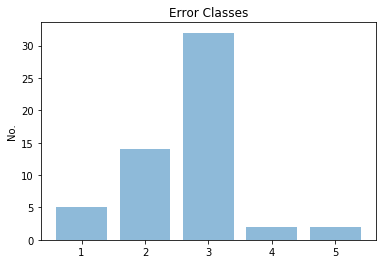

In [26]:
orignalClass = []
for i in range(size(res,1)):
    if res[i][3] != res[i][4]:
        orignalClass.append(orig2['Empathy'].iloc[i])

errorClasses = [orignalClass.count(i) for i in range(1,6)]
classes = ('1','2','3','4','5')
yPos = arange(len(classes))
 
plt.bar(yPos, errorClasses, align='center', alpha=0.5)
plt.xticks(yPos, classes)
plt.ylabel('No.')
plt.title("Error Classes")
plt.show()

### Final Remarks

As predicted we can see that most of error were made for empathy = 3 (Orignal Data). Hence perhaps its not fair to covert 3 to 0. However, we are predicting the positive classes correctly and not missing any valuable candidate.